<a href="https://colab.research.google.com/github/mattstaney/AIML-Projects/blob/main/Matt_Staney_FoodHub_Project_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Write your code here to read the data
df = pd.read_csv('/content/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
* There are 1,898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   The costs of order is the only foat while the rest are equally either an object/string or intiger
*   order_id and customer_id's are both intigers which means their are no letters in the data and they will be handled numerically
* rating is an object which means there are probably some missing values so it will need to be treated or removed to change the data type in this collumn to integer to do correlations




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
#Converting 'rating' variable to int64 and any values of 'Not given' convert to NaN

# Convert 'rating' to numeric, coerce errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Check for missing values again
df.isnull().sum()

#save new values to dataset
df.to_csv('foodhub_order.csv', index=False)


#### Observations:
* At first there are no missing values but found there are some missing values in ratings given the 1-5 rating scale is being used but the dtype is an object.
* Looking at head() shows there are some rating values as "Not given"
* Converted the rating variable to int and found 738 missing variables then coerced all "Not given" values to NaN


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Calculate the number of orders with missing ratings
not_rated_orders = df['rating'].isnull().sum()

print(f"There are {not_rated_orders} orders that are not rated.")


There are 736 orders that are not rated.


In [ ]:
# Showing the percentage of rated vs not rated orders

# Calculate the total number of orders
total_orders = len(df)

# Calculate the number of rated orders
rated_orders = total_orders - not_rated_orders

# Calculate the percentage of rated orders
percentage_rated = (rated_orders / total_orders) * 100

# Calculate the percentage of not rated orders
percentage_not_rated = (not_rated_orders / total_orders) * 100

# Print the results
print(f"Percentage of rated orders: {percentage_rated:.2f}%")
print(f"Percentage of not rated orders: {percentage_not_rated:.2f}%")


Percentage of rated orders: 61.22%
Percentage of not rated orders: 38.78%


#### Observations:
* I may potentially need to figure out later how to treat the missing ratings given that 39% of orders don't have a rating as that could potentially affect my analysis, though that seems pretty standard for this type of of application. I don't think I rate my food delivery every time I order, myself.
*I believe there are enough ratings to still find a correlation with this ratings variable for other variables like delivery time to make an analysis

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

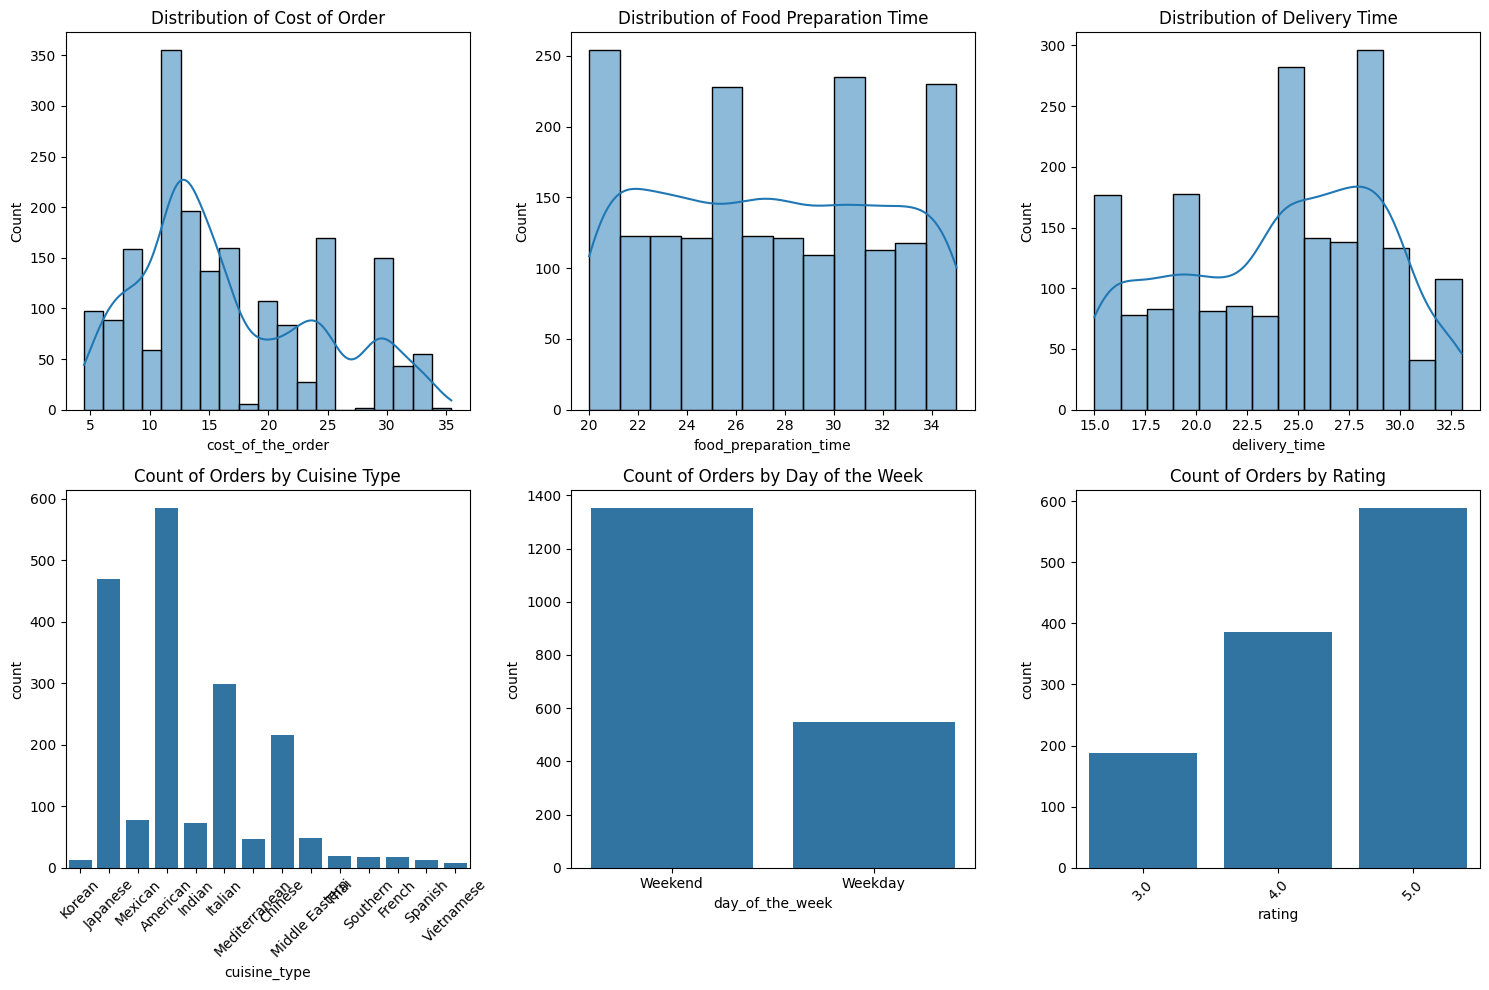

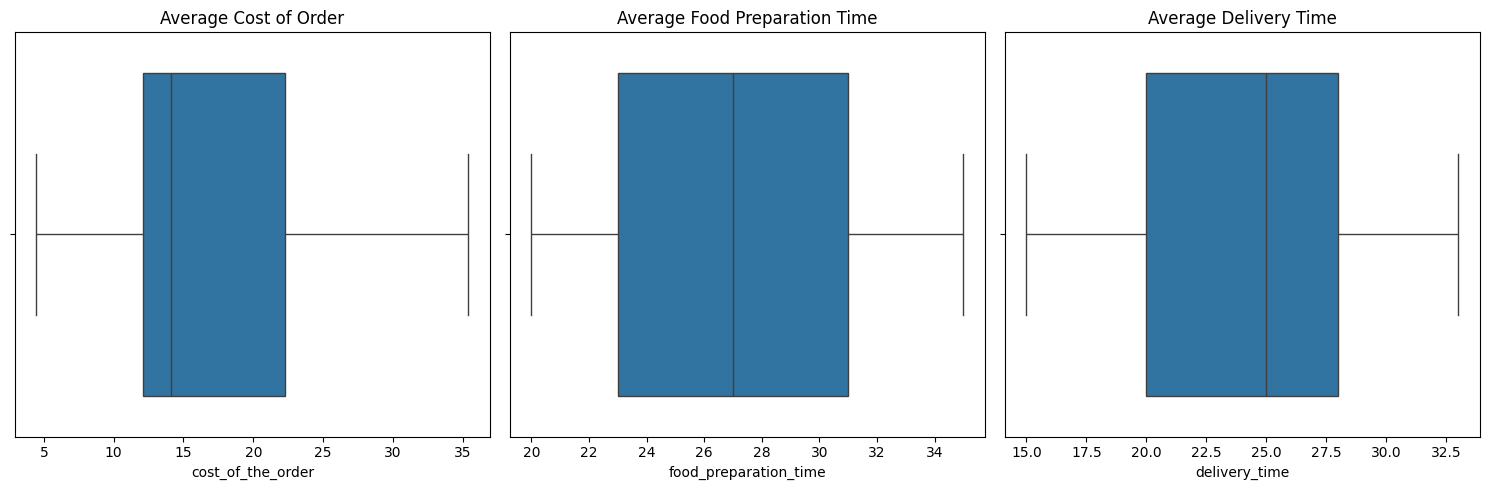

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting histograms for numerical variables

# Cost of Order
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(df['cost_of_the_order'], kde=True)
plt.title('Distribution of Cost of Order')

# Food Prep Time
plt.subplot(2, 3, 2)
sns.histplot(df['food_preparation_time'], kde=True)
plt.title('Distribution of Food Preparation Time')

# Delivery Time
plt.subplot(2, 3, 3)
sns.histplot(df['delivery_time'], kde=True)
plt.title('Distribution of Delivery Time')

# Plotting countplots for categorical variables

# Orders by Cuisine Type
plt.subplot(2, 3, 4)
sns.countplot(x='cuisine_type', data=df)
plt.title('Count of Orders by Cuisine Type')
plt.xticks(rotation=45)

#Orders by Day of the Week
plt.subplot(2, 3, 5)
sns.countplot(x='day_of_the_week', data=df)
plt.title('Count of Orders by Day of the Week')

# Orders by Rating
plt.subplot(2, 3, 6)
sns.countplot(x='rating', data=df)
plt.title('Count of Orders by Rating')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plotting boxplots for numerical variables

#Cost of Order
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cost_of_the_order', data=df)
plt.title('Average Cost of Order')

#Food Prep Time
plt.subplot(1, 3, 2)
sns.boxplot(x='food_preparation_time', data=df)
plt.title('Average Food Preparation Time')

#Delivery Time
plt.subplot(1, 3, 3)
sns.boxplot(x='delivery_time', data=df)
plt.title('Average Delivery Time')

plt.tight_layout()
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')


# Observations from the Univariate Analysis:
##Histogram Analysis:
###Cost of Order:

* The distribution of the cost of the order is right-skewed, indicating that most orders are clustered around lower values, with fewer expensive orders.
* A significant portion of the orders are between 10 and 20 dollars, which seems to be a sweet spot for customer spending. There are outliers representing higher costs, but these are less frequent.

###Food Preparation Time:

* The distribution of food preparation time shows a fairly normal distribution, with most preparation times falling between 20 and 30 minutes.
* There are occasional outliers where preparation times extend beyond 40 minutes, but these instances are rare.

###Delivery Time:

* The delivery time distribution is right-skewed as well, with most orders being delivered within 20 to 30 minutes.
* However, there is a tail extending towards higher delivery times, which suggests that while most deliveries are on time, a few outliers take considerably longer, possibly affecting customer satisfaction.

##Countplot Analysis:
###Orders by Cuisine Type:

* There is a clear dominance of American, Mexican, and Japanese cuisines in the dataset, with these three being the most popular choices among customers.
Other cuisines like Chinese and Italian also have a decent number of orders, but less so compared to the top three.
* This shows that customer preferences are skewed towards certain cuisines, which businesses can capitalize on through targeted promotions.

###Orders by Day of the Week:

* There is a balanced distribution between weekday and weekend orders, with only a slight increase in orders during the weekends. This indicates steady demand throughout the week, with a minor weekend boost.
Orders by Rating:

* The majority of orders have ratings of 4 or 5, which indicates that overall, customers are quite satisfied with their orders.
There are fewer orders rated 1 to 3, suggesting that customer dissatisfaction is relatively low, but these cases may represent areas for improvement.

##Boxplot Analysis:
###Cost of Order:

* The boxplot for cost of the order reveals that the interquartile range (IQR) is relatively tight, with most costs ranging from around 10 to 20 dollars.
The presence of outliers at higher costs indicates that some customers do spend more, but these are not frequent. This could suggest an opportunity to upsell premium or bundled items to increase average order value.

###Food Preparation Time:

* The food preparation time boxplot shows that most preparation times fall within a narrow range, with few outliers. This suggests that restaurants are fairly consistent in preparing food within expected time limits.
* However, the outliers with longer preparation times could be areas for improvement, especially for specific cuisines that take longer to prepare.

###Delivery Time:

* The delivery time boxplot indicates that most deliveries are completed within a reasonable timeframe, but there are some notable outliers where delivery times are much longer. Addressing these outliers could significantly improve overall customer satisfaction.

# Additional Observations:
* Customer Satisfaction: The strong concentration of ratings at 4 and 5 suggests a generally positive customer experience, but there is still room to investigate the factors behind lower ratings (e.g., long delivery times or high costs).
* Order Cost and Demand: Most orders tend to be affordable, between 10 and 20 dollars, indicating that the customer base may prioritize value for money.
* Promotions targeting higher-value items or offering bundles may help increase the average order value without sacrificing customer satisfaction.
* Cuisine Popularity: American, Mexican, and Japanese cuisines dominate the orders. This trend could be leveraged to offer specialized deals or introduce new menu items within these popular categories to increase engagement.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


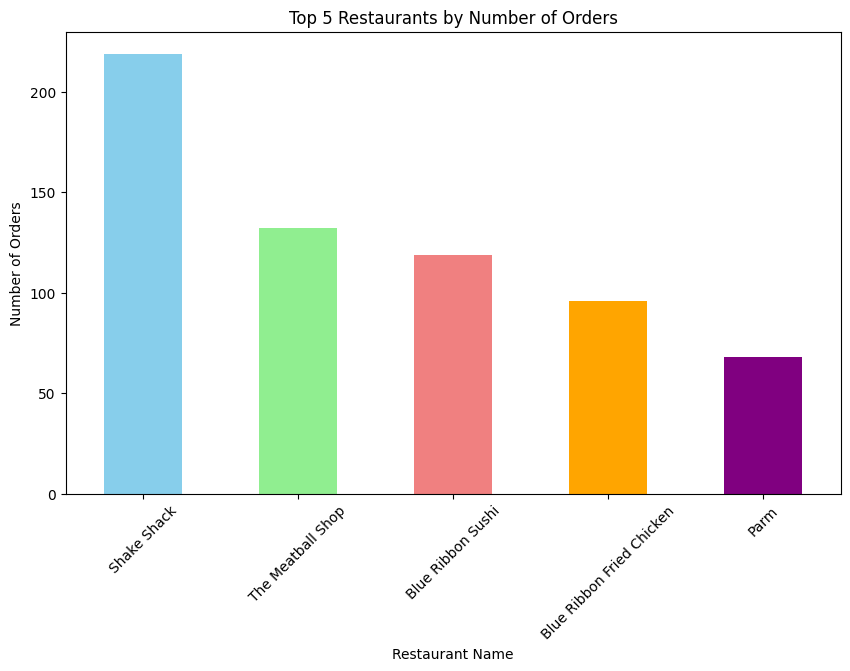

<Figure size 640x480 with 0 Axes>

In [ ]:
#Top 5 restaurants regarding the number of orders received

# Calculating the number of orders for each restaurant
top_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_restaurants)

# Creating a bar plot
plt.figure(figsize=(10, 6))
top_restaurants.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple']);
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.title('Top 5 Restaurants by Number of Orders')
plt.xticks(rotation=45)
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

#### Observations:
* Shake Shack as the most orders at 219
* The most popular restuaraunts with the most orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Friend Chicken, and Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

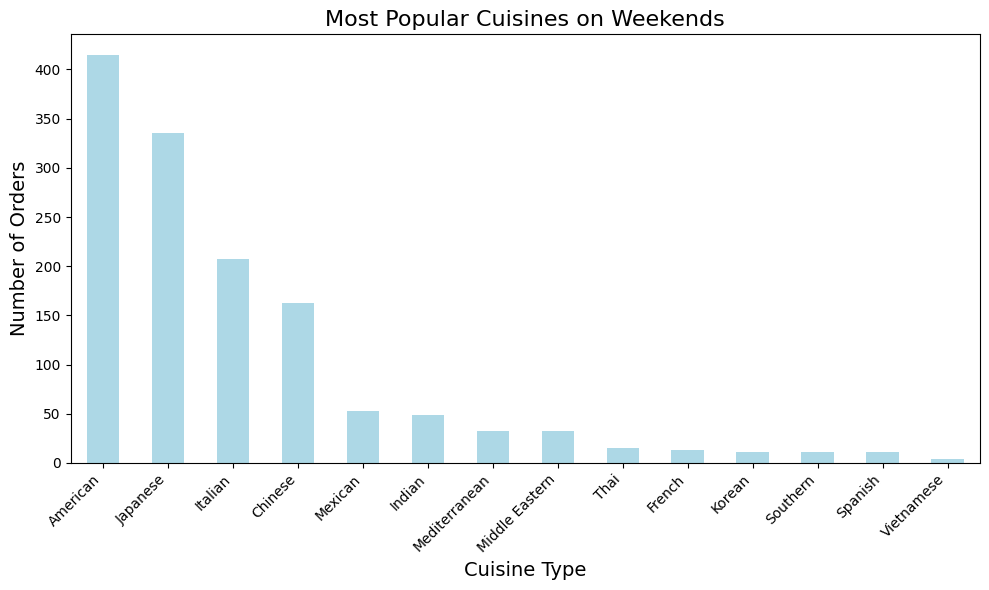

American is the most popular cuisine on weekends.


<Figure size 640x480 with 0 Axes>

In [ ]:
# Filtering data for weekend orders
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Finding the most popular cuisine on weekends based on the number of orders
weekend_cuisine_count = weekend_data['cuisine_type'].value_counts()

# Ploting a bar graph of the weekend cuisines
plt.figure(figsize=(10,6))
weekend_cuisine_count.plot(kind='bar', color='lightblue')
plt.title('Most Popular Cuisines on Weekends', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Displaying the plot
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

# Displaying the most popular cuisine
most_popular_cuisine = weekend_cuisine_count.idxmax()
print(most_popular_cuisine, 'is the most popular cuisine on weekends.')


#### Observations:
* American is the most popular cuisine on the weekends, followed closely by Japanese

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

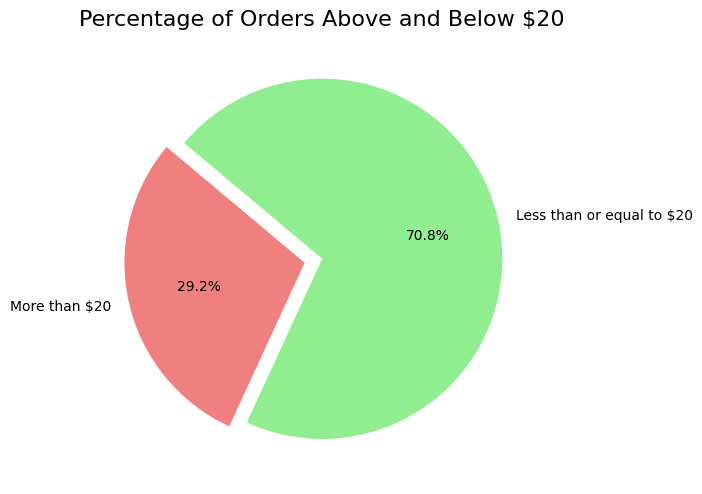

The percentage of orders that cost more than $20 equals 29.24130663856691


<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculating the percentage of orders costing more than $20
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]
total_orders = df.shape[0]
percentage_above_20 = (orders_above_20 / total_orders) * 100

# Ploting a pie chart showing the percentage of orders above and below $20
labels = ['More than $20', 'Less than or equal to $20']
sizes = [orders_above_20, total_orders - orders_above_20]
colors = ['lightcoral', 'lightgreen']
explode = (0.1, 0)  # explode the 'More than $20' slice

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Orders Above and Below $20', fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()
plt.savefig("output.jpg", bbox_inches='tight')

# Show the calculated percentage
print('The percentage of orders that cost more than $20 equals', percentage_above_20)

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculating the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

mean_delivery_time




24.161749209694417

#### Observations:
* The average delivery time is around 24.16 minutes, which is relatively reasonable for food delivery. This could indicate efficient operations by the restaurants and delivery services in this dataset.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Find the top 3 most frequent customers based on the number of orders
top_3_customers = df['customer_id'].value_counts().head(3)

# Show the top 3 customer IDs and the number of orders they placed
top_3_customers


,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
* These three customers will receive the 20% discount vouchers as they are the most frequent users.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


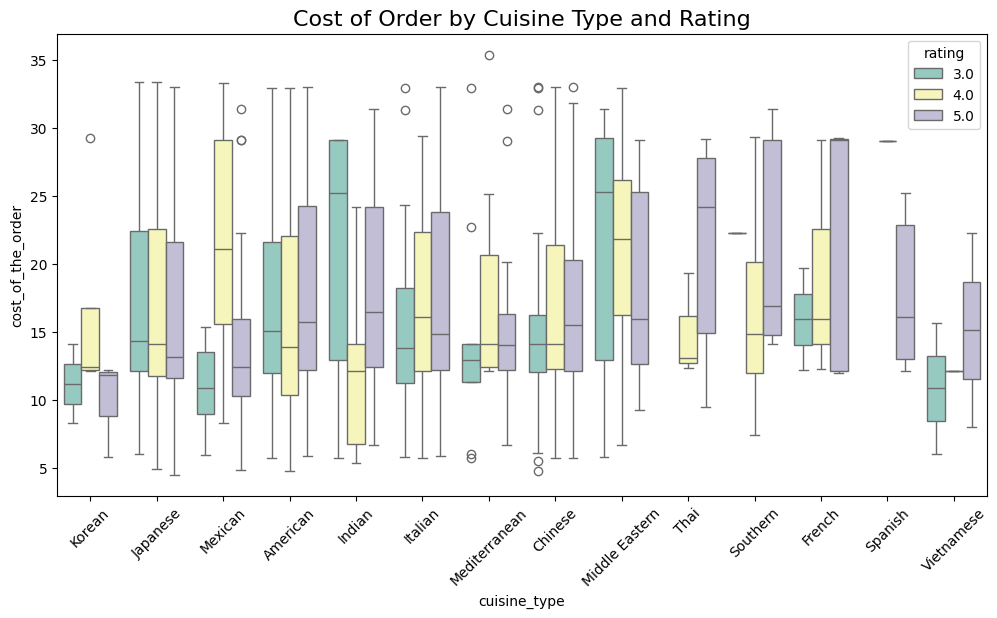

<ipython-input-29-a77e5f3fb092>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='delivery_time', data=df, palette='Set2')


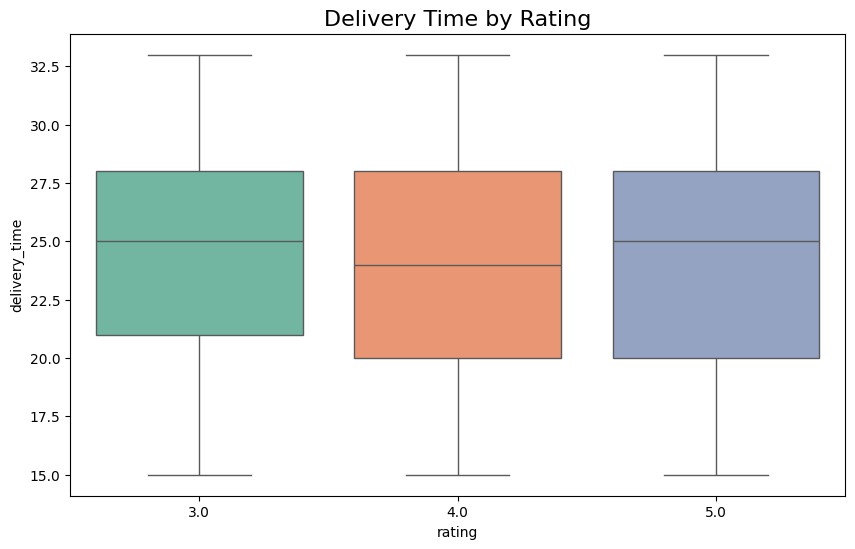

<ipython-input-29-a77e5f3fb092>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, palette='coolwarm')


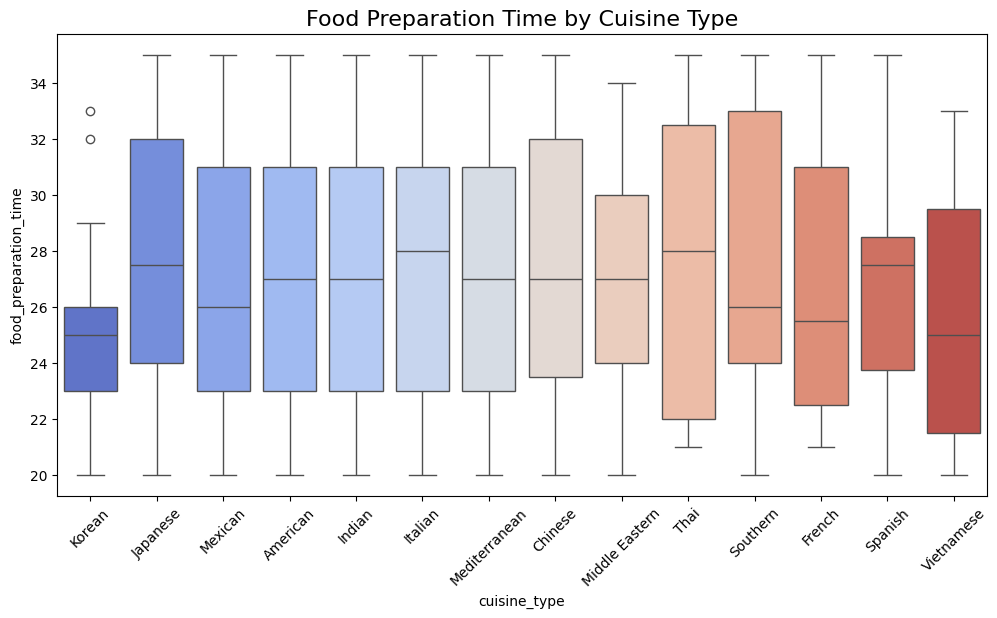

<ipython-input-29-a77e5f3fb092>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df, palette='Set1')


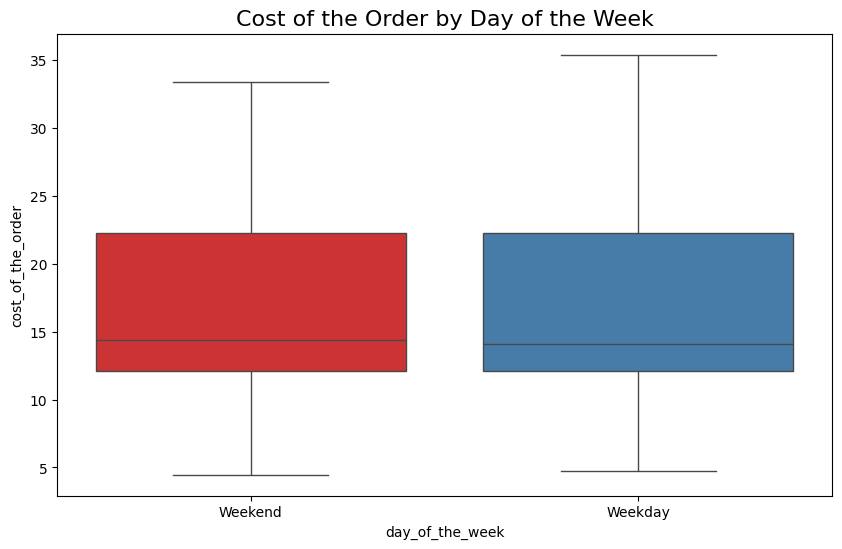

<Figure size 640x480 with 0 Axes>

In [ ]:
# Analysis 1: Relationship between Cost of Order, Cuisine Type, and Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', hue='rating', data=df, palette='Set3')
plt.title('Cost of Order by Cuisine Type and Rating', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Analysis 2: Relationship between Delivery Time and Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='delivery_time', data=df, palette='Set2')
plt.title('Delivery Time by Rating', fontsize=16)
plt.show()

# Analysis 3: Distribution of Food Preparation Time across Cuisine Types
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, palette='coolwarm')
plt.title('Food Preparation Time by Cuisine Type', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Analysis 4: Cost of Order on Weekdays vs Weekends
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df, palette='Set1')
plt.title('Cost of the Order by Day of the Week', fontsize=16)
plt.show()

plt.savefig("output.jpg", bbox_inches='tight')


# Analysis 1: Relationship between Cost of Order, Cuisine Type, and Rating

* **Cost Differences Across Cuisines:** Certain cuisines, such as Japanese and American, tend to have higher variability in order costs, likely reflecting a wider range of meal types and pricing options.

* **Higher Ratings with Moderate Costs:** Orders with higher ratings (4 or 5 stars) are not necessarily tied to higher costs across all cuisines. In some cases, lower-cost orders receive similarly high ratings, indicating that customers value quality and service regardless of price.

* **Rating Distribution Across Cuisines:** Some cuisines, like Mexican and Chinese, seem to have more consistent, moderate pricing, with ratings varying less compared to others.

# Analysis 2: Relationship between Delivery Time and Rating
* **Shorter Delivery Times, Higher Ratings:** There’s a clear pattern where orders with higher ratings (4 and 5 stars) tend to have shorter delivery times. This suggests that customers value timely deliveries, and long wait times may negatively affect their satisfaction.

* **Low Ratings with Long Delivery Times:** Orders with ratings of 1-3 stars generally have longer delivery times, reinforcing the idea that quicker service improves customer experience.

# Analysis 3: Distribution of Food Preparation Time Across Cuisine Types
* **Cuisine-Dependent Preparation Times:** Japanese, Mexican, and Chinese cuisines tend to have shorter preparation times, while American and Indian cuisines have longer preparation times. This could be due to differences in the complexity of dishes and cooking methods.

* **Higher Variability in Preparation Times:** Some cuisines, such as American, show a larger range in preparation times, suggesting variability in the types of meals offered (e.g., fast food vs. gourmet options).

# Analysis 4: Cost of Order on Weekdays vs Weekends
* **Slightly Higher Spending on Weekends:** Although the median cost of orders remains relatively stable between weekdays and weekends, there is slightly more variation in costs on weekends. This could indicate that customers may place larger or more expensive orders when they have more free time.

* **Consistency in Spending:** The data shows that customer spending patterns do not drastically change between weekdays and weekends, suggesting consistent demand for food delivery throughout the week.

# Overall Insights:

* **Delivery Time Impact:** Delivery time seems to be a key factor influencing customer satisfaction and ratings. Shorter delivery times consistently correlate with higher ratings.
* **Cuisine Influence on Cost and Preparation Time:** The type of cuisine plays a significant role in determining both the cost of the order and the preparation time. Restaurants offering quicker-to-prepare meals might benefit from more satisfied customers.
* **Consistent Spending Habits:** Customers show similar spending patterns on both weekdays and weekends, though weekends see a bit more variability in terms of order size and cost.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Group by restaurant and calculate the rating count and average rating
restaurant_rating_stats = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    avg_rating=('rating', 'mean')
).reset_index()

# Filter restaurants with rating count > 50 and average rating > 4
promotional_restaurants = restaurant_rating_stats[
    (restaurant_rating_stats['rating_count'] > 50) & (restaurant_rating_stats['avg_rating'] > 4)
]

# Show the restaurants that qualify for the promotional offer
promotional_restaurants

,restaurant_name,rating_count,avg_rating
20,Blue Ribbon Fried Chicken,64,4.328125
21,Blue Ribbon Sushi,73,4.219178
136,Shake Shack,133,4.278195
153,The Meatball Shop,84,4.511905


#### Observations:
* Four restaurants meet the criteria for the promotional offer, with a combination of high rating counts and impressive average ratings.
* Shake Shack has the highest number of ratings, while The Meatball Shop has the highest average rating at 4.51.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Creating a function to calculate revenue per order
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25  # 25% for orders greater than $20
    elif cost > 5:
        return cost * 0.15  # 15% for orders greater than $5
    else:
        return 0  # No commission for orders $5 or below

# Apply the revenue calculation to each order
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Calculate the total revenue generated by the company
total_revenue = df['revenue'].sum()

total_revenue


6166.303

#### Observations:
* The company generates significant revenue by charging a higher commission of 25% on orders over 20 dollars and a lower commission of 15% on orders between 5 and 20 dollars.


* The calculation shows that most of the company's revenue likely comes from orders above 20 dollars, as they provide a higher percentage return.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate the total time required to deliver the food (preparation time + delivery time)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that take more than 60 minutes
orders_above_60 = df[df['total_time'] > 60].shape[0]
total_orders = df.shape[0]
percentage_above_60 = (orders_above_60 / total_orders) * 100

percentage_above_60


10.537407797681771

#### Observations:
* A relatively small percentage (about 10.54%) of orders take longer than 60 minutes from the time of order placement to delivery.
* This could indicate efficient operations for most restaurants, as the majority of orders are delivered within an hour.
* Orders taking longer than 60 minutes could be a result of either complex food preparation or delays in delivery.
* Investigating these cases further could help identify areas for improvement.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

mean_delivery_time_by_day


,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
* The delivery time is longer on weekdays (28.34 minutes) compared to weekends (22.47 minutes).
* This difference may be due to increased traffic or demand during the week, affecting delivery efficiency.
* On weekends, there may be fewer time constraints, resulting in quicker deliveries.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

**1. Delivery Time's Significant Impact on Customer Satisfaction:**

* I observed that customer satisfaction (as reflected by
ratings) is closely linked to delivery time. Orders delivered quickly tend to receive higher ratings, whereas longer delivery times often result in lower ratings.
* While the average delivery time on weekends is shorter than on weekdays, this still suggests a potential operational inefficiency during busier periods such as weekdays.

**2. Cuisine Type Influences Order Cost and Preparation Time:**

* Different cuisine types show considerable variation in both the cost of orders and the time required to prepare meals. For example, cuisines like American and Indian tend to have longer preparation times, while Japanese and Mexican are faster.
* The variation in preparation time across cuisines could impact overall delivery efficiency, particularly if slower cuisines are paired with high-demand delivery times.

**3. Customer Spending Behavior is Stable Across Weekdays and Weekends:**

* Customers tend to spend similar amounts on food delivery regardless of whether it's a weekday or weekend. However, weekend orders display slightly more variability, indicating a potential for larger or higher-cost orders during this time.

**4. Rating Patterns Across Cuisines:**

* Ratings don't vary significantly based solely on order cost, implying that customers value other factors such as timely delivery and food quality more than price. However, certain cuisines like Mexican and Japanese consistently receive higher ratings, while others have more variability.
* The relationship between cuisine type, preparation time, and ratings suggests that efficient operations for certain cuisines can lead to higher customer satisfaction.

**5. Promotional Offer Criteria:**

I identified that four restaurants qualify for a promotional offer based on having more than 50 ratings and an average rating above 4. These restaurants already perform well, and further promoting them could enhance customer loyalty and drive repeat orders.

### Recommendations:

**1. Improve Delivery Efficiency:**

* Given that longer delivery times lead to lower customer ratings, I recommend focusing on optimizing delivery logistics, particularly during weekday rush hours when delivery times are longer. This can include improving route planning, increasing the number of delivery personnel during peak times, or forming partnerships with faster delivery services.

* Consider implementing a real-time delivery tracking system to keep customers informed about delays, which could mitigate dissatisfaction due to longer wait times.

**2. Optimize for Cuisine-Specific Efficiency:**

* Since some cuisines have longer preparation times, work with restaurants to streamline their kitchen operations, particularly for high-demand cuisines like American and Indian. Offering options for quicker-to-prepare items or ensuring that preparation time doesn’t unnecessarily delay deliveries could improve overall customer satisfaction.

* Promote faster cuisines like Japanese and Mexican, especially during peak delivery hours, as these can be delivered more efficiently, leading to better customer experiences.

**3. Focus on High-Rated Cuisines for Promotions:**

* The analysis suggests that Mexican, Japanese, and American cuisines tend to receive higher ratings. I recommend creating promotional campaigns or discounts focused on these cuisines to capitalize on customer satisfaction and increase order volume.
* Encourage restaurants offering these cuisines to maintain their high standards while improving the consistency of their services to maintain or improve customer ratings.

**4. Offer Incentives for Improved Ratings:**

* Encourage customers to provide feedback by offering small incentives such as discount codes or free items for leaving a rating, particularly for those who have yet to provide one.
* For restaurants that consistently receive lower ratings, provide detailed feedback based on the analysis and offer training or operational support to help them improve their performance.

**5. Targeted Promotions on Weekends:**

* Weekends show more variability in customer spending, which means that targeted promotions during these periods (e.g., discounts for larger orders) could increase revenue.

* Focus on upselling premium meals or bundles during the weekends when customers are more likely to place larger orders.

**6. Leverage Data for Personalization:**

* Use customer order patterns (cuisine preference, spending habits) to personalize marketing efforts. For example, send push notifications or emails recommending their preferred cuisines, or provide deals on days they typically order.

In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Python Course/Projects/Matt_Staney_FoodHub_Project_Learner_Notebook_Full_Code.ipynb''

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


---